In [1]:
import sys
sys.path.append('../')

import os

import cqt
import cqt.env.mkt_env as env 
import cqt.env.mkt_env_spot as envspot
import cqt.ledger.ledger as ledger
import cqt.datagen as dg
import cqt.dbutility.dbutility as db
import cqt.strats.strategy as stg
import cqt.strats.strategy_long_short_average as stg_ls
import pandas as pd
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import copy
import cqt.strats.StrategyTensorFlow as stg_tf

outDir = '../performance_tracking'
if not os.path.exists(outDir):
    os.makedirs(outDir)
    print(outDir)
    
#pickleFileDir = '../data/pickle'
#file_btc = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.pickle'
#df_btc = pd.read_pickle(file_btc)
#file_eth = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1DAY_data.pickle'
#df_eth = pd.read_pickle(file_eth)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('../data/webdata/Gemini_BTCUSD_d.csv',skiprows=1)
data.rename(columns={'Open': 'price_open', 'High': 'price_high', 'Low': 'price_low', 'Close': 'price_close', 'Volume BTC':'volume_traded','Date':'time_close'},inplace=True)
df_btc=dg.IndexedData("","",data)

In [3]:
config = {'asset_type': 'spot'}
model_btc = env.MktEnv([])
comp_btc = envspot.MktEnvSpot('btc', df_btc, config)
comp_btc.data=comp_btc.data.sort_index()
comp_btc.data=comp_btc.data.loc[comp_btc.data.index > datetime.strptime('2018-01-01', '%Y-%m-%d')]
model_btc.insert_section(comp_btc)

In [6]:
cash = 10000
assets = {'btc': 0}
ini_pfo = ledger.Ledger(assets, cash)


ls_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}

strats_train = stg_tf.StrategyTensorFlow(model_btc, ini_pfo, ls_rule)
strats_train.train()

debug final 54503.01336143244
Epoch #: 0 Reward: 54503.013361 Epsilon: 1.000000
Saved model to disk
debug final 14588.225273869288
Epoch #: 1 Reward: 14588.225274 Epsilon: 0.900000
Saved model to disk
debug final 4190.747690331984
Epoch #: 2 Reward: 4190.747690 Epsilon: 0.800000
Saved model to disk
debug final 16354.665460003864
Epoch #: 3 Reward: 16354.665460 Epsilon: 0.700000
Saved model to disk
debug final 11752.624018956525
Epoch #: 4 Reward: 11752.624019 Epsilon: 0.600000
Saved model to disk
debug final 17434.560427056116
Epoch #: 5 Reward: 17434.560427 Epsilon: 0.500000
Saved model to disk
debug final 21258.963573772307
Epoch #: 6 Reward: 21258.963574 Epsilon: 0.400000
Saved model to disk
debug final 40764.655664769496
Epoch #: 7 Reward: 40764.655665 Epsilon: 0.300000
Saved model to disk
debug final 5976.7804962172495
Epoch #: 8 Reward: 5976.780496 Epsilon: 0.200000
Saved model to disk
debug final 15410.416367294874
Epoch #: 9 Reward: 15410.416367 Epsilon: 0.100000
Saved model to

In [ ]:




cash = 10000
assets = {'btc': 0}
ini_pfo = ledger.Ledger(assets, cash)


ls_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}



In [ ]:
strats = stg_tf.StrategyTensorFlow(model_btc, ini_pfo, ls_rule, './data/6-model.json', './data/6-model.h5', 'scaler.pkl')
start_date_str = '2018-01-02'
end_date_str='2019-11-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date=datetime.strptime(end_date_str, '%Y-%m-%d')

report = strats.back_testing(start_date ,end_date)


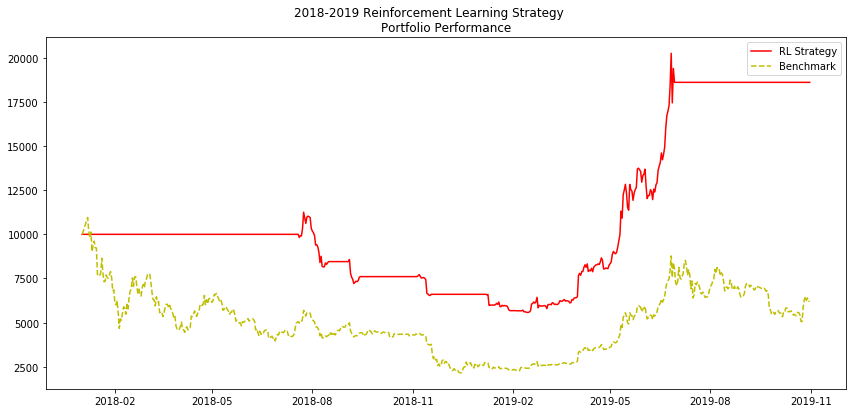

In [16]:
strategyName = '2018-2019 Reinforcement Learning Strategy'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 6
fig, ax0 = plt.subplots(figsize=(fig_width,fig_height))
ax0.plot(report['date'], report['total'],'r',label='RL Strategy')
ax0.plot(report['date'], report['btc_price'] * cash / report['btc_price'][0],'y--',label='Benchmark')
ax0.set_title('Portfolio Performance')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.legend()